<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Introduction to Machine Learning <br>
<font color=696880 size=4>
<!-- <br> -->
CE 40477 - Fall 2024

____


<font color=green size=6>
Recap of linear regression

**Steps:**
  - simplifed explanation of linear regression
  - closed form solution -> implementing LR from scratch
  - polynomial regression -> implementation
  - we could be using interactive pyplots to show the effect of degree
  - visualizing $E_{rms}$ as plot
  - regularization (ridge and lasso) and comparing them -> also compare generalization

<font color=green size=6>
Recap of linear regression

 **Steps:**
  - simplifed explanation of GD and SGD
  - implement derivatives in code
  - first, come up with a convex $J(w)$ and plot each step of convergens
  - then, compe up with a more generalized cost function and choose random starting points to reach different minima -> 3D plotting could help massively

<font color=green size=6>
Further exercises

  **Suggestions:**
  - we could use basis functions other than polynomial -> simply define other basis functions and use scikit tools to define a solution with proper generalization in another feature space
  - this might be too soon for students to get used to -> should we even call it kernel ?
  - Arshia knows a good house prices dataset with multiple features. We could implement house price regression and plot them in Tehran map to make it more attractive !

## Generate Synthetic Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_data(n=50, noise=10.0):
    np.random.seed(42)  # For reproducibility
    X = np.linspace(-10, 10, n)
    true_slope = 2.5
    true_intercept = 5.0
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

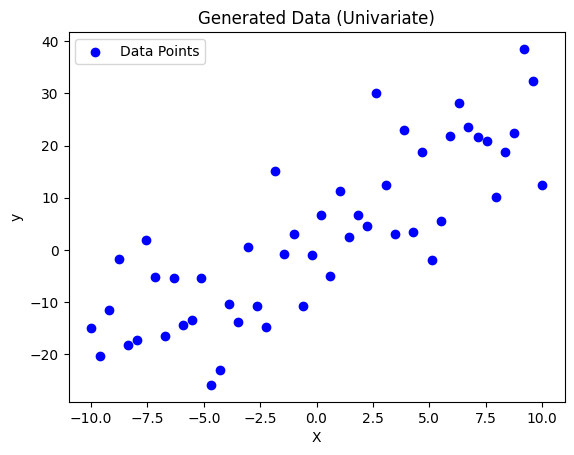

In [ ]:
X, y = generate_data()
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Implement the Closed-Form Solution

In [ ]:
def linear_regression_closed_form(X, y):
    X_b = np.c_[np.ones((len(X), 1)), X]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

theta = linear_regression_closed_form(X, y)
print(f"Parameters (theta): Intercept = {theta[0]:.2f}, Slope = {theta[1]:.2f}")

Parameters (theta): Intercept = 2.75, Slope = 2.21


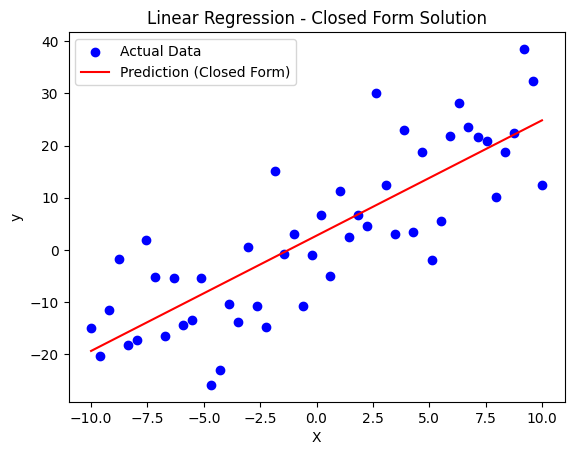

In [ ]:
y_pred = theta[0] + theta[1] * X
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed Form)')
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Polynomial Regression
Linear regression can be extended to model nonlinear relationships by introducing polynomial terms.


## Create Polynomial Features

In [ ]:
def polynomial_features(X, degree):
    X_poly = np.c_[np.ones(len(X))]
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, X**i]
    return X_poly

## Implement Polynomial Regression

In [ ]:
def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)
    theta_best = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return theta_best

degree = 5
theta_poly = polynomial_regression(X, y, degree)
print(f"Parameters (theta) for Degree {degree}: {theta_poly}")

Parameters (theta) for Degree 5: [ 7.62256225e-01  3.61915524e+00  6.56217891e-02 -4.30987468e-02
 -1.35616512e-04  2.76350988e-04]


## Visualize the Polynomial Fit

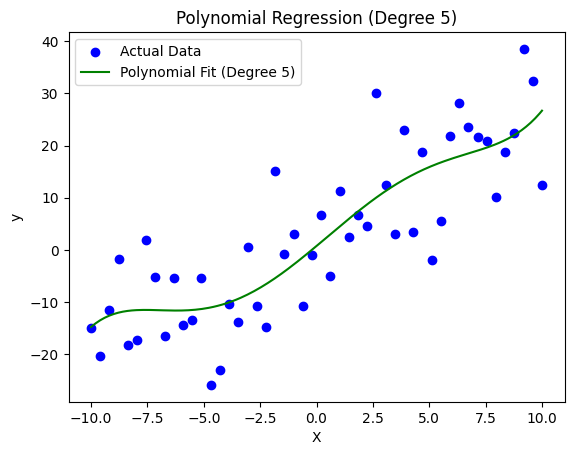

In [ ]:
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_features(X_fit, degree)
y_poly_pred = X_fit_poly.dot(theta_poly)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Polynomial Fit (Degree {degree})')
plt.title(f"Polynomial Regression (Degree {degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Visualizing 𝐸_𝑟𝑚𝑠 as a Plot
The Root Mean Square Error (RMSE) helps us understand how well our model fits the data.

## Compute RMSE

In [ ]:
def compute_rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

## Plot RMSE vs Polynomial Degree

Degree 1: RMSE = 9.08


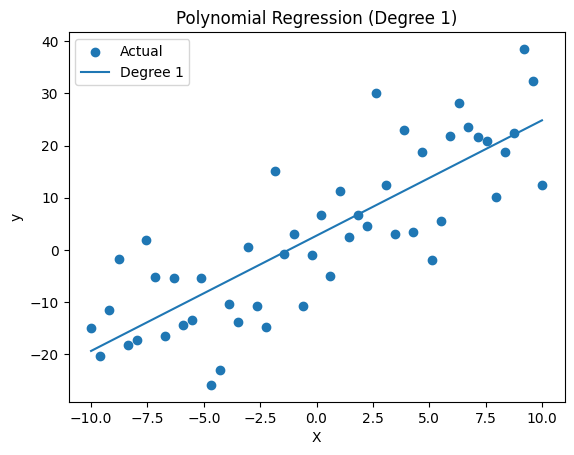

Degree 2: RMSE = 8.93


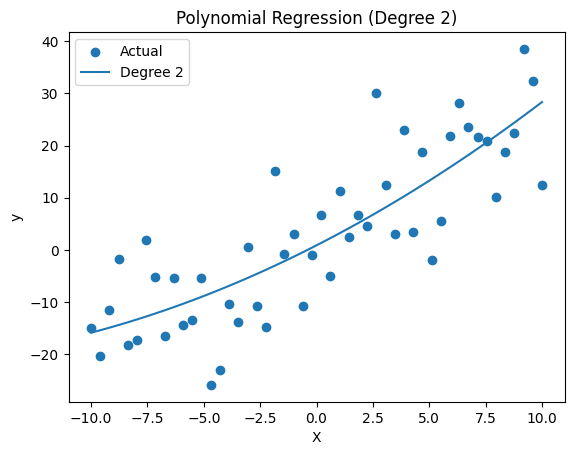

Degree 3: RMSE = 8.75


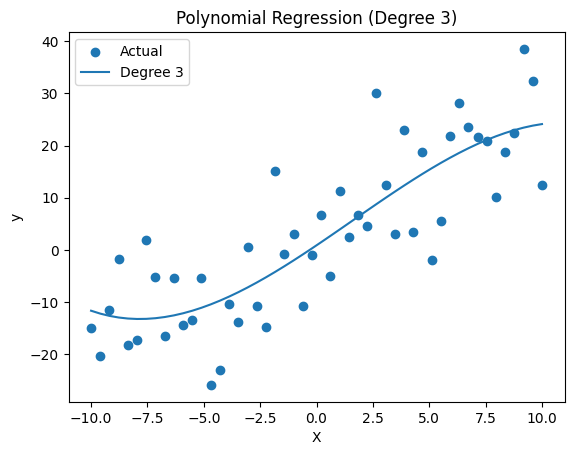

Degree 4: RMSE = 8.75


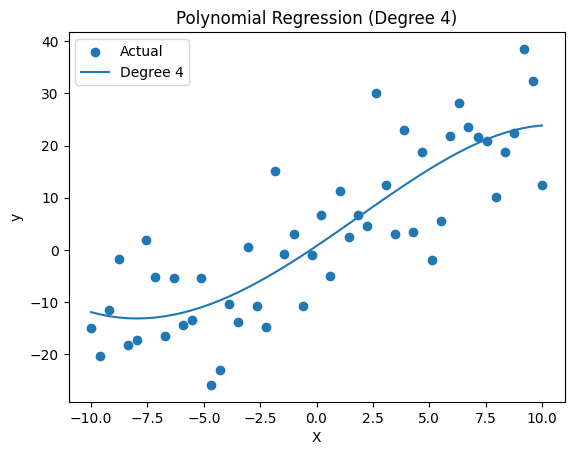

Degree 5: RMSE = 8.67


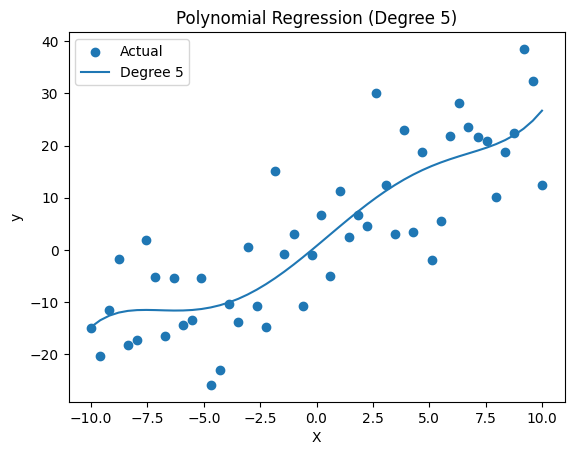

Degree 6: RMSE = 8.41


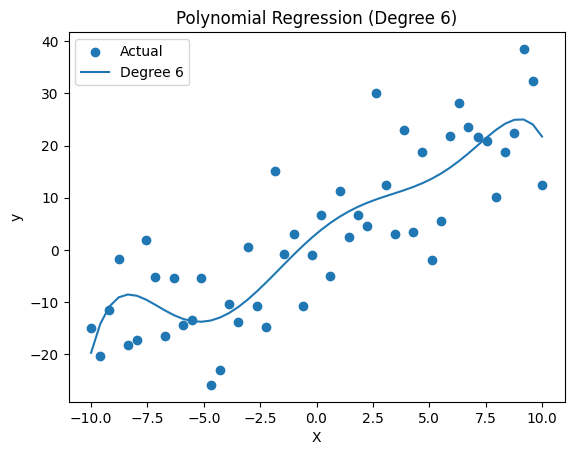

Degree 7: RMSE = 8.38


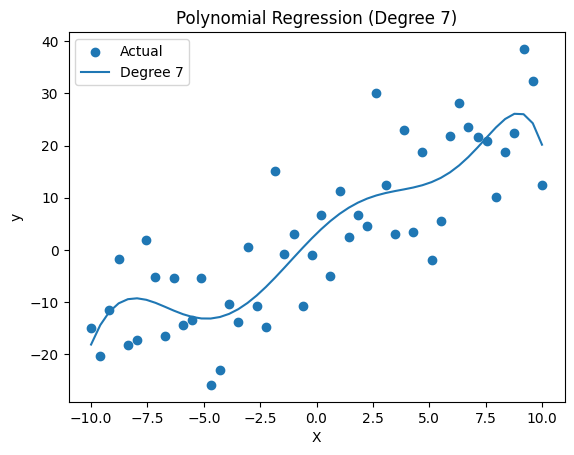

Degree 8: RMSE = 8.38


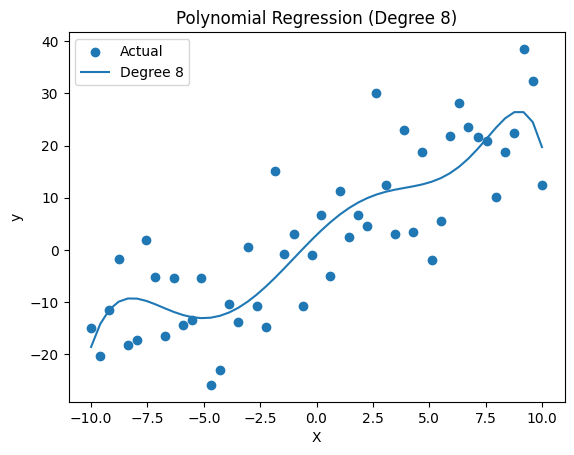

Degree 9: RMSE = 8.20


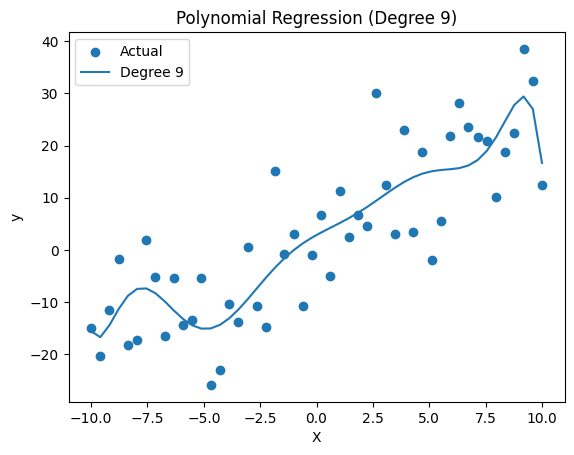

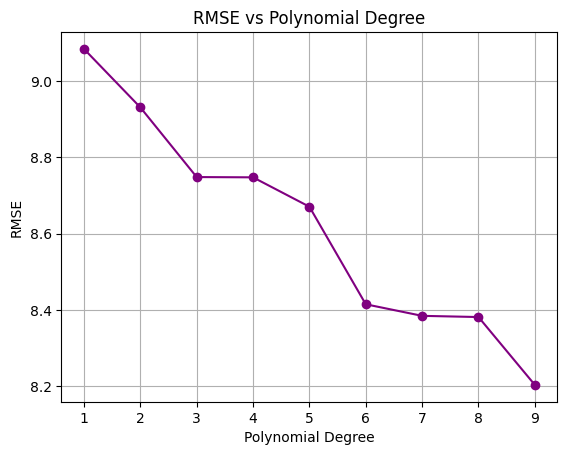

In [ ]:
degrees = range(1, 10)
rms_errors = []

for d in degrees:
    theta_poly = polynomial_regression(X, y, d)
    X_poly = polynomial_features(X, d)
    y_poly_pred = X_poly.dot(theta_poly)
    rms_error = compute_rms_error(y, y_poly_pred)
    rms_errors.append(rms_error)
    print(f"Degree {d}: RMSE = {rms_error:.2f}")
    plt.scatter(X, y, label="Actual")
    plt.plot(X, y_poly_pred, label=f"Degree {d}")
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

plt.plot(degrees, rms_errors, marker='o', linestyle='-', color='purple')
plt.title("RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.grid(True)
plt.show()

# Regularization: Ridge and Lasso Regression

## Implementing Ridge and Lasso Regression
We'll use scikit-learn for these implementations.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.67321e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e+03, tolerance: 1.260e+00
  model = cd_fast.enet_coordinate_descent(


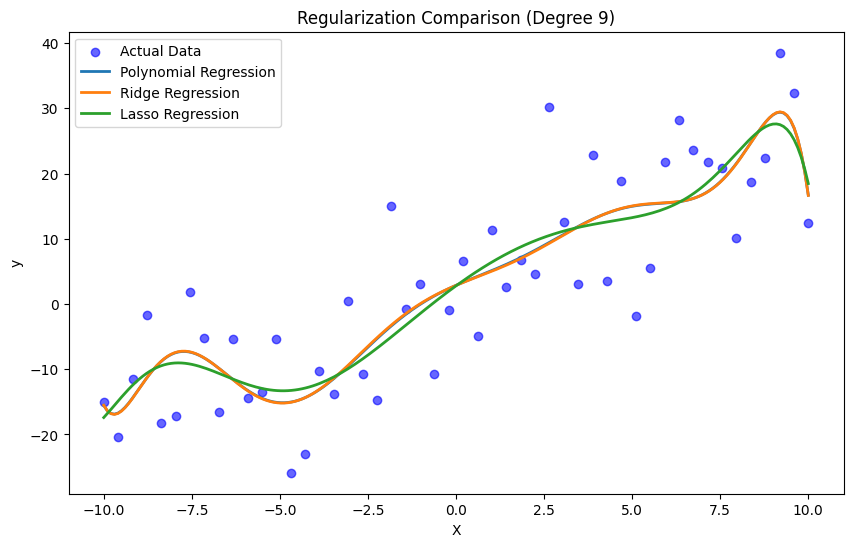

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

degree = 9
X_reshape = X.reshape(-1, 1)

model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_poly.fit(X_reshape, y)

model_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
model_ridge.fit(X_reshape, y)

model_lasso = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1, max_iter=10000))
model_lasso.fit(X_reshape, y)

X_plot = np.linspace(X.min(), X.max(), 200)[:, np.newaxis]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)

plt.plot(X_plot, model_poly.predict(X_plot), label='Polynomial Regression', linewidth=2)
plt.plot(X_plot, model_ridge.predict(X_plot), label='Ridge Regression', linewidth=2)
plt.plot(X_plot, model_lasso.predict(X_plot), label='Lasso Regression', linewidth=2)

plt.title(f"Regularization Comparison (Degree {degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Gradient Descent Optimization
## Implementing Gradient Descent on a Convex Function
### Define a Convex Cost Function

In [55]:
def J_convex(w):
    return w[0]**2 + 2 * w[1]**2

def grad_J_convex(w):
    return np.array([2 * w[0], 4 * w[1]])

### Implement Gradient Descent

In [ ]:
def gradient_descent(grad, w_init, learning_rate=0.1, n_steps=20):
    w = np.array(w_init)
    path = [w.copy()]

    for step in range(n_steps):
        grad_w = grad(w)
        w = w - learning_rate * grad_w
        path.append(w.copy())

    return np.array(path)

### Visualize the Gradient Descent Path

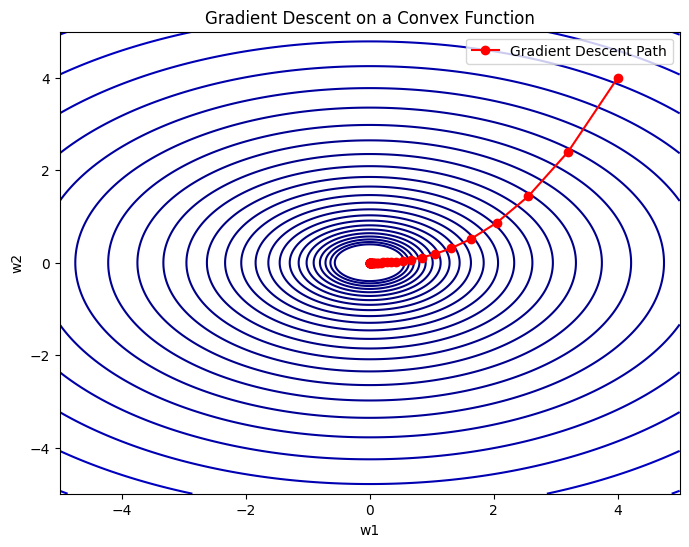

In [ ]:
w_init = [4, 4]
path_convex = gradient_descent(grad_J_convex, w_init, learning_rate=0.1, n_steps=50)

w1_vals = np.linspace(-5, 5, 400)
w2_vals = np.linspace(-5, 5, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
J_vals = J_convex([W1, W2])

plt.figure(figsize=(8, 6))
contour_levels = np.logspace(-0.5, 3, 35)
plt.contour(W1, W2, J_vals, levels=contour_levels, cmap="jet")
path_x, path_y = path_convex[:, 0], path_convex[:, 1]
plt.plot(path_x, path_y, marker='o', color='red', label='Gradient Descent Path')
plt.title("Gradient Descent on a Convex Function")
plt.xlabel("w1")
plt.ylabel("w2")
plt.legend()
plt.show()

## Implementing Gradient Descent on a Non-Convex Function

### Implementing the Himmelblau's Function

In [106]:
def J_nonconvex(w):
    x, y = w
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def grad_J_nonconvex(w):
    x, y = w
    df_dx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    df_dy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([df_dx, df_dy])

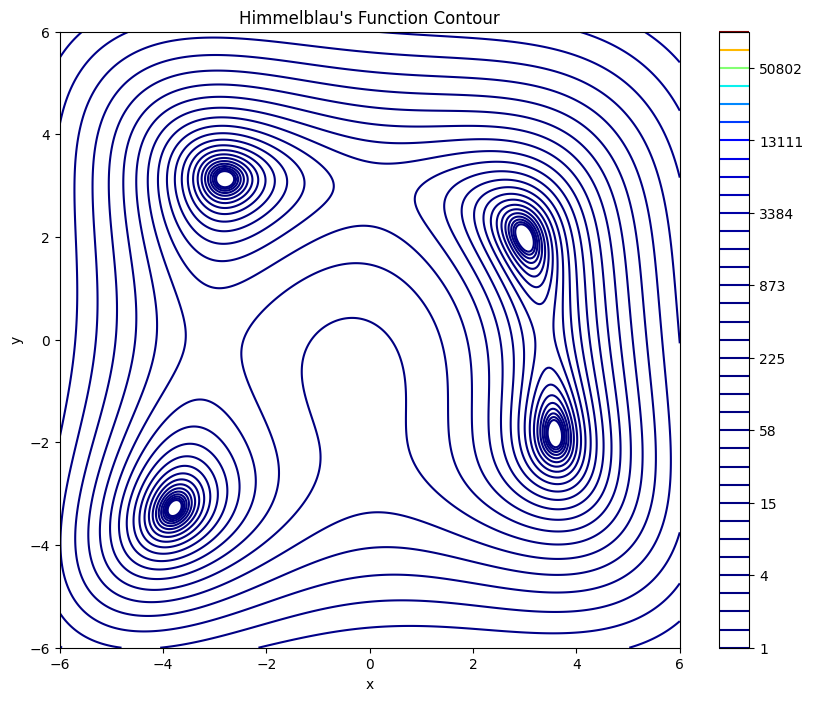

In [107]:
x_vals = np.linspace(-6, 6, 400)
y_vals = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = J_nonconvex([X, Y])

plt.figure(figsize=(10, 8))
contour_levels = np.logspace(0, 5, 35)
plt.contour(X, Y, Z, levels=contour_levels, cmap='jet')
plt.title("Himmelblau's Function Contour")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [108]:
def gradient_descent(grad, w_init, learning_rate=0.01, n_steps=10000, tolerance=1e-6):
    w = np.array(w_init, dtype=float)
    path = [w.copy()]

    for step in range(n_steps):
        grad_w = grad(w)
        grad_norm = np.linalg.norm(grad_w)
        if grad_norm < tolerance:
            print(f"Converged in {step} steps.")
            break
        w = w - learning_rate * grad_w
        path.append(w.copy())

    return np.array(path)

In [109]:
starting_points = [
    [0.0, 0.0],
    [-4.0, 4.0],
    [4.0, 4.0],
    [-5.0, -5.0]
]

paths = []
for idx, w_init in enumerate(starting_points):
    print(f"\nStarting Point {idx+1}: {w_init}")
    path = gradient_descent(grad_J_nonconvex, w_init, learning_rate=0.001, n_steps=10000)
    paths.append(path)


Starting Point 1: [0.0, 0.0]
Converged in 672 steps.

Starting Point 2: [-4.0, 4.0]
Converged in 264 steps.

Starting Point 3: [4.0, 4.0]
Converged in 634 steps.

Starting Point 4: [-5.0, -5.0]
Converged in 248 steps.


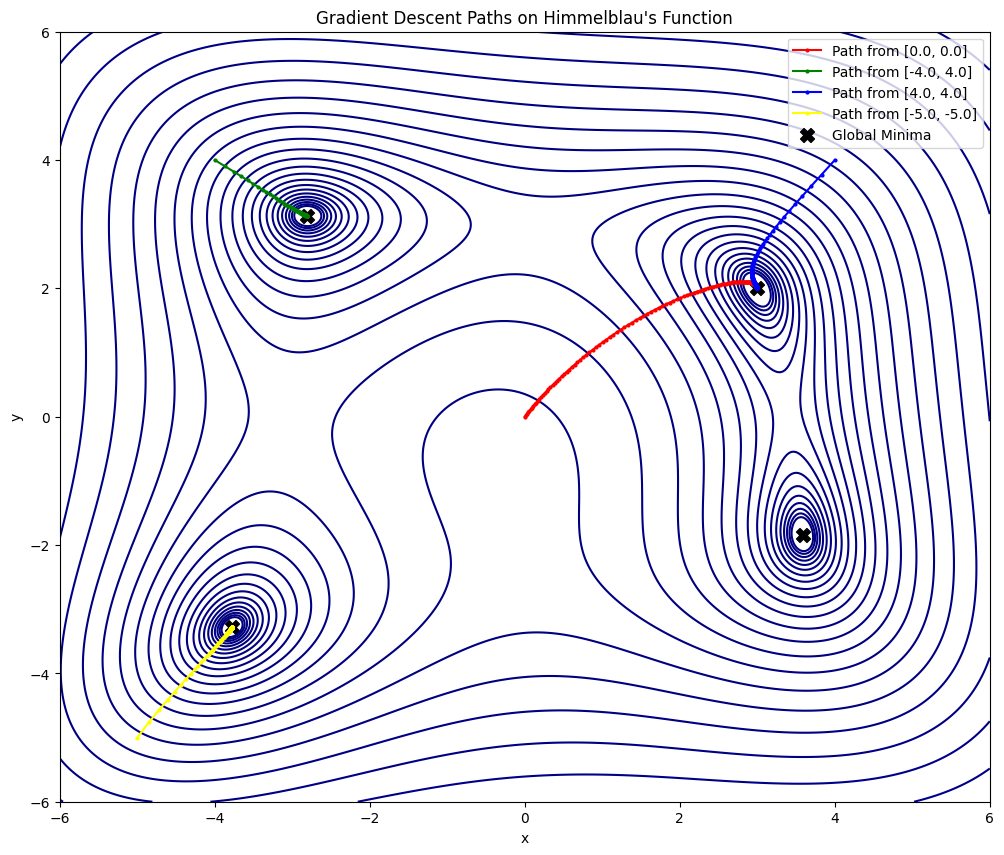

In [110]:
plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, levels=contour_levels, cmap='jet')
colors = ['red', 'green', 'blue', 'yellow']
labels = [f'Path from {p}' for p in starting_points]

for idx, path in enumerate(paths):
    path_x, path_y = path[:, 0], path[:, 1]
    plt.plot(path_x, path_y, marker='o', markersize=2, color=colors[idx], label=labels[idx])

minima = np.array([
    [3.0, 2.0],
    [-2.805118, 3.131312],
    [-3.779310, -3.283186],
    [3.584428, -1.848126]
])
plt.scatter(minima[:, 0], minima[:, 1], color='black', s=100, marker='X', label='Global Minima')

plt.title("Gradient Descent Paths on Himmelblau's Function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [112]:
learning_rates = [0.0001, 0.001, 0.01]
w_init = [0.5, -0.5]
paths_lr = []

for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")
    path = gradient_descent(grad_J_nonconvex, w_init, learning_rate=lr, n_steps=10000)
    paths_lr.append((lr, path))


Learning Rate: 0.0001
Converged in 8713 steps.

Learning Rate: 0.001
Converged in 873 steps.

Learning Rate: 0.01
Converged in 100 steps.


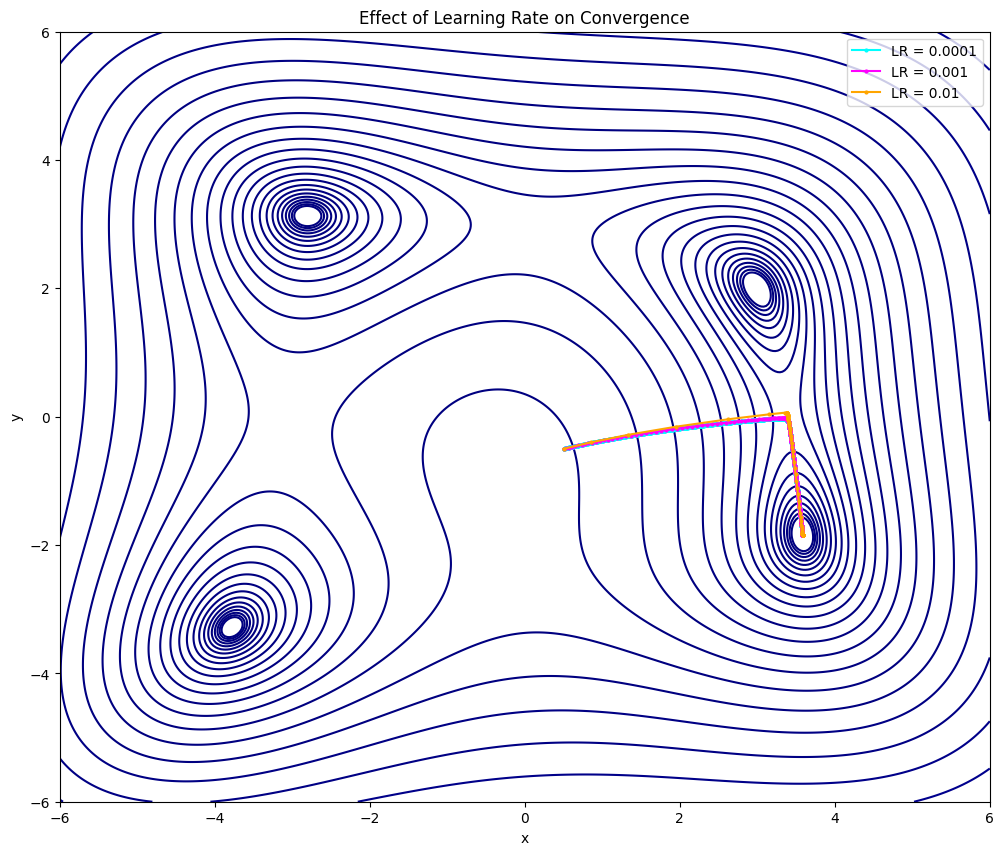

In [113]:
plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, levels=contour_levels, cmap='jet')
colors = ['cyan', 'magenta', 'orange']
labels = [f'LR = {lr}' for lr, _ in paths_lr]

for idx, (lr, path) in enumerate(paths_lr):
    path_x, path_y = path[:, 0], path[:, 1]
    plt.plot(path_x, path_y, marker='o', markersize=2, color=colors[idx], label=labels[idx])

plt.title("Effect of Learning Rate on Convergence")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [114]:
def gradient_descent_momentum(grad, w_init, learning_rate=0.01, n_steps=10000, momentum=0.9, tolerance=1e-6):
    w = np.array(w_init, dtype=float)
    v = np.zeros_like(w)
    path = [w.copy()]

    for step in range(n_steps):
        grad_w = grad(w)
        grad_norm = np.linalg.norm(grad_w)
        if grad_norm < tolerance:
            print(f"Converged in {step} steps.")
            break
        v = momentum * v - learning_rate * grad_w
        w = w + v
        path.append(w.copy())

    return np.array(path)

Converged in 348 steps.


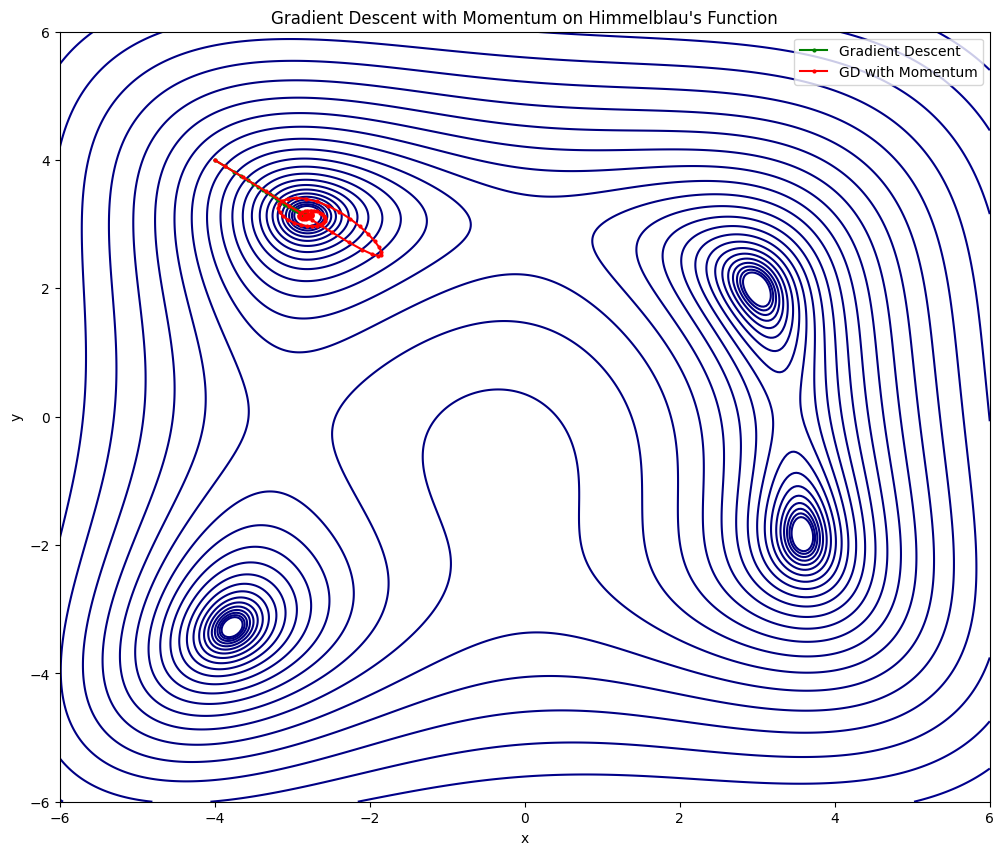

In [115]:
w_init = [-4.0, 4.0]
path_momentum = gradient_descent_momentum(grad_J_nonconvex, w_init, learning_rate=0.001, n_steps=10000)

plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, levels=contour_levels, cmap='jet')

path_x, path_y = paths[1][:, 0], paths[1][:, 1]
plt.plot(path_x, path_y, marker='o', markersize=2, color='green', label='Gradient Descent')

path_m_x, path_m_y = path_momentum[:, 0], path_momentum[:, 1]
plt.plot(path_m_x, path_m_y, marker='o', markersize=2, color='red', label='GD with Momentum')

plt.title("Gradient Descent with Momentum on Himmelblau's Function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Real-World Example1: California House Price Prediction

## Dataset
We'll use the California Housing Dataset available in scikit-learn.

In [116]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X, y = housing.data, housing.target

feature_names = housing.feature_names
print("Feature names:", feature_names)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Data Preprocessing

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implement Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 0.75


## Feature Importance

In [119]:
coefficients = model.coef_
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.3f}")

MedInc: 0.854
HouseAge: 0.123
AveRooms: -0.294
AveBedrms: 0.339
Population: -0.002
AveOccup: -0.041
Latitude: -0.897
Longitude: -0.870


## Visualize Actual vs Predicted Prices

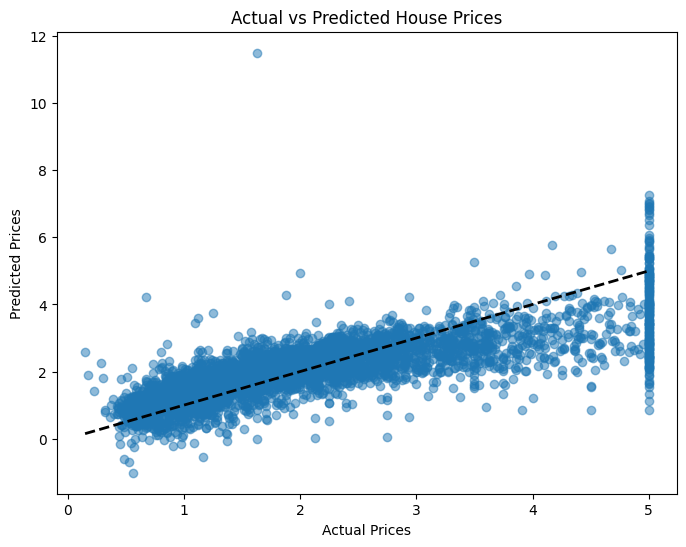

In [120]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Real-World Example2: Tehran House Price Prediction

In [123]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
data = pd.read_excel('/content/housePrice.xlsx')

data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceUSD
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [124]:
df.isnull().sum()
df.describe()

,Area,Room,Price,PriceUSD
count,3.479000e+03,3479.000000,3.479000e+03,3.479000e+03
mean,8.744000e+06,2.079908,5.359023e+09,1.786341e+05
std,3.167266e+08,0.758275,8.099935e+09,2.699978e+05
min,3.000000e+01,0.000000,3.600000e+06,1.200000e+02
25%,6.900000e+01,2.000000,1.418250e+09,4.727500e+04
50%,9.000000e+01,2.000000,2.900000e+09,9.666667e+04
75%,1.200000e+02,2.000000,6.000000e+09,2.000000e+05
max,1.616000e+10,5.000000,9.240000e+10,3.080000e+06
